##### **Clasificación desempeño del estudiante (datos sin Indicador de Logro)**

El modelo predice la calificación final del estudiante a partir de un algoritmo de clasificación, el umbral de desempeño es:

0 - Bajo desempeño (calificación entre 0.0 y 2.9)
1 - Medio desempeño (calificación entre 3.0 y 4.0)
2 - Alto desempeño (calificación entre 4.1 y 5.0)
##### **Tareas**
- Generar el balanceo de los datos.
- Seleccionar las mejores características.
- Dividir los datos en 80% para entrenamiento y 20% para pruebas
- Aplicar hiperparámetros (gridsearch) a los algoritmos: Naive Bayes (NB), SVM, Árbol de decisión (DT) y Bosque Aleatorio (RF).
- Entrenar los modelos con las mejores características.
- Obtener las métricas: matriz de confusión, accuracy, precisión, recall y f1 score.
- Crear una lista con los resultados f1 score obtenidos para los 4 algoritmos.
- Generar una gráfica de barras para identificar cúal fue el algoritmo que obtuvo los mejores resultados.

##### **Diccionario de datos**

Variable	Tipo	Descripción
lab_1	numérico decimal	Calificación del laboratorio 1
tiempo_entrega_lab_1	numérico decimal	Tiempo de entrega del laboratorio 1 (horas)
intentos_lab_1	numérico entero	Total de intentos del laboratorio 1
resultado_lab_1	numérico entero	Resultado de INGInious para el laboratorio 1 (0- No presentó; 1- Failed ; 2- Overflow ; 3- Success)
lab_2	numérico decimal	Calificación del laboratorio 2
lab_3	numérico decimal	Calificación del laboratorio 3
grade	numérico entero	Calificación final (0- Bajo desempeño; 1- Medio desempeño; 2- Alto desempeño)

In [113]:
# Se importan las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

##### INSERTE SU CÓDIGO AQUÍ #####
# Modelos Clasificación: Naive Bayes (NB), SVM, Árboles de Decisión (DT), Bosque Aleatorio (RF) 
# Libreria para Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
# Libreria para SVM
from sklearn.svm import SVC
# Libreria para árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Libreria para Bosque Aleatorio
from sklearn.ensemble import RandomForestClassifier
# Libreria para el resample 
from sklearn.utils import resample
# Mejores características - Eli5
from eli5 import show_weights
# Libreria para dividir los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split
# Genera la matriz de confusión
from sklearn.metrics import confusion_matrix
# Gerera el reporte de la clasificación
from sklearn.metrics import classification_report
# Librerias para métricas del modelo
from sklearn.metrics import precision_score, recall_score, f1_score
# Libreria para calcular la media y la desviación estándar utilizadas en las características
import statistics
# Libreria de búsqueda en cuadrícula
from sklearn.model_selection import GridSearchCV
##### FIN CÓDIGO INSERTADO #####

In [114]:
# Se cargan los registros en un DataFrame 
data = pd.read_csv("data_set/student_performance.csv", sep=";")

data

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
0,4.4,0.63,2,3,4.4,4.9,2
1,3.3,0.33,1,3,3.3,3.7,1
2,4.7,0.78,3,3,4.3,4.8,2
3,4.3,0.28,1,3,4.0,4.9,2
4,4.2,0.50,10,3,3.1,4.9,1
...,...,...,...,...,...,...,...
463,2.2,3.89,6,3,3.0,3.5,1
464,4.6,0.35,1,0,0.0,0.0,0
465,4.6,0.48,1,0,5.0,0.0,1
466,4.6,0.00,0,0,0.0,0.0,0


In [115]:
#Preprocesamiento de datos
# Se buscan registros NaN para eliminarlos
print('Columna         Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

# Se eliminan los registros NA
#data = data.dropna()

Columna         Cantidad NaN
lab_1                   0
tiempo_entrega_lab_1    0
intentos_lab_1          0
resultado_lab_1         0
lab_2                   0
lab_3                   0
grade                   0
dtype: int64
(468, 7)


In [116]:
# Se consulta la cantidad de registros para Grade
data.groupby('grade').size()

grade
0    162
1    200
2    106
dtype: int64

In [117]:
##### INSERTE SU CÓDIGO AQUÍ #####
# Se realiza el resample 

df_alto = data[data['grade'] == 1]
df_medio = data[data['grade'] == 0]
df_bajo = data[data['grade'] == 2]

data_oversample = resample(df_medio,
                    replace = True,
                    n_samples = 200,
                    random_state = 1)
data_oversample_2 = resample(df_bajo,
                    replace = True,
                    n_samples = 200,
                    random_state = 1)

data2 = pd.concat([df_alto, data_oversample,data_oversample_2])

data2['grade'].value_counts()
##### FIN CÓDIGO INSERTADO #####

1    200
0    200
2    200
Name: grade, dtype: int64

In [118]:
# Se genera las estadísticas del DataFrame
data2.describe()

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000
mean,2.954000,2.202933,3.060000,2.621667,3.29350,4.044833,1.000000
std,1.854422,4.200492,4.514092,0.888733,1.83559,1.590888,0.817178
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.300000,1.000000,3.000000,1.60000,4.000000,0.000000
50%,3.550000,0.480000,1.000000,3.000000,4.00000,4.900000,1.000000
75%,4.700000,1.000000,3.000000,3.000000,4.90000,5.000000,2.000000
max,5.000000,22.080000,39.000000,3.000000,5.00000,5.000000,2.000000


In [119]:
# Se observa el tipo de datos de las columnas
data2.dtypes

lab_1                   float64
tiempo_entrega_lab_1    float64
intentos_lab_1            int64
resultado_lab_1           int64
lab_2                   float64
lab_3                   float64
grade                     int64
dtype: object

In [120]:
#----------------------------------------
#Predicción con todas las características
#Se crea el set de entrenamiento y de pruebas
# Se definen los valores de las características	

features = ['lab_1','tiempo_entrega_lab_1','intentos_lab_1','resultado_lab_1',
            'lab_2','lab_3']
			
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

##### INSERTE SU CÓDIGO AQUÍ #####
# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size= 0.8, random_state=2)

##### FIN CÓDIGO INSERTADO #####

In [121]:
# Se crea el modelo
dtc = DecisionTreeClassifier() 
  
# Se entrena el modelo
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

##### INSERTE SU CÓDIGO AQUÍ #####
show_weights(dtc, feature_names = features)

##### FIN CÓDIGO INSERTADO #####

Weight,Feature
0.4512,lab_1
0.3649,lab_2
0.0922,lab_3
0.0470,tiempo_entrega_lab_1
0.0246,resultado_lab_1
0.0202,intentos_lab_1


In [128]:
#--------------------------------------------------------------------------
#Predicción con ajuste de Hiperparámetros (Grid Search)

# Se definen los valores de las características
features = ['lab_1','lab_2','lab_3']
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

##### INSERTE SU CÓDIGO AQUÍ #####
# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size= 0.8,)
##### FIN CÓDIGO INSERTADO #####

In [129]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()

# Parámetros

grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator = nb, 
                           param_grid = grid, 
                           cv= 10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))

f1_score_nb = round(f1_score(y_test, pred, average='weighted'),2)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (GridSearch): GaussianNB(var_smoothing=0.08111308307896872)
-----------------------------------------------------------
[[23 14  0]
 [ 2 39  4]
 [ 0  0 38]]
              precision    recall  f1-score   support

           0       0.92      0.62      0.74        37
           1       0.74      0.87      0.80        45
           2       0.90      1.00      0.95        38

    accuracy                           0.83       120
   macro avg       0.85      0.83      0.83       120
weighted avg       0.85      0.83      0.83       120

Precisión:  0.85
Recall:  0.83
F1-Score:  0.83


In [130]:
#SVM
##### INSERTE SU CÓDIGO AQUÍ #####
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Parámetros

svm = SVC(C=10, gamma=10)


searchResults = svm.fit(X_train, y_train)

# extract the best model and evaluate it
bestModel = searchResults

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
svm = bestModel

# Se entrena el modelo
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))
f1_score_svm = round(f1_score(y_test, pred, average='weighted'),2)
##### FIN CÓDIGO INSERTADO #####

Best Parameters (GridSearch): SVC(C=10, gamma=10)
-----------------------------------------------------------
[[36  1  0]
 [ 7 37  1]
 [ 0  0 38]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.97      0.82      0.89        45
           2       0.97      1.00      0.99        38

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.92       120

Precisión:  0.93
Recall:  0.92
F1-Score:  0.92


In [131]:
##Árbol de Decisión (DT)
##### INSERTE SU CÓDIGO AQUÍ #####
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Parámetros

dtc = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5) 


searchResults = dtc.fit(X_train, y_train)

# extract the best model and evaluate it
bestModel = searchResults

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
dtc = bestModel

# Se entrena el modelo
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))
f1_score_dt = round(f1_score(y_test, pred, average='weighted'),2)

##### FIN CÓDIGO INSERTADO #####

Best Parameters (GridSearch): DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)
-----------------------------------------------------------
[[36  1  0]
 [ 7 38  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.97      0.84      0.90        45
           2       1.00      1.00      1.00        38

    accuracy                           0.93       120
   macro avg       0.94      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120

Precisión:  0.94
Recall:  0.93
F1-Score:  0.93


In [132]:
#Bosque Aleatorio (RF)
##### INSERTE SU CÓDIGO AQUÍ #####
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Parámetros

rfc = RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_split=10, n_estimators=5) 


searchResults = rfc.fit(X_train, y_train)

# extract the best model and evaluate it
bestModel = searchResults

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
rfc = bestModel

# Se entrena el modelo
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))
f1_score_rfc = round(f1_score(y_test, pred, average='weighted'),2)

##### FIN CÓDIGO INSERTADO #####

Best Parameters (GridSearch): RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_split=10, n_estimators=5)
-----------------------------------------------------------
[[36  1  0]
 [10 35  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.97      0.78      0.86        45
           2       1.00      1.00      1.00        38

    accuracy                           0.91       120
   macro avg       0.92      0.92      0.91       120
weighted avg       0.92      0.91      0.91       120

Precisión:  0.92
Recall:  0.91
F1-Score:  0.91


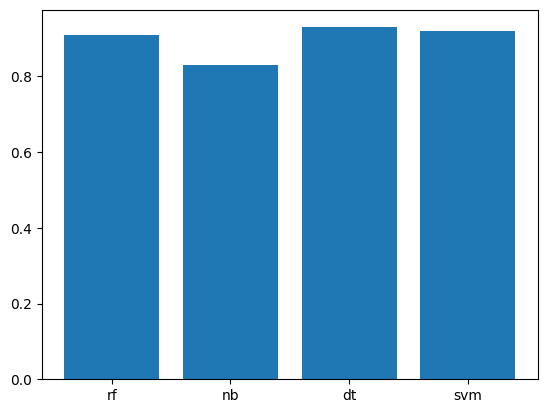

In [152]:
x = ['rf','nb','dt', 'svm']
y = [f1_score_rfc,f1_score_nb,f1_score_dt,f1_score_svm]
plt.bar(x,y)
plt.show()